In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd

# 2. Warm_start
https://frhyme.github.io/python-libs/sklearn_warm_start/
- sklearn에서 model의 warm_start의 default는 False임. 이는 .fit을 실행할 때, 이전에 업데이트된 weight(coefficient)를 초기화하고 다시 fitting한다는 것을 의미한다.
- 만약 warm_start를 True로 설정하고 진행한다면, .fit을 실행할 때 이전의 weight를 기억하고 그대로 이어서 업데이트되는 것을 말한다.

- 일반적인 머신러닝 모델 구축은 그냥 fit - predict가 다죠. 네, 데이터를 전달하고 학습시키고, 예측합니다. 그리고 sklearn의 대부분의 모델들의 메소드도 이렇게 정리되어 있구요.
- 다만, 저처럼 컴퓨터의 메모리가 형편없다거나, 하는 경우에는 데이터를 나누어서 학습하는 것이 필요합니다. 한번에 다 넘기면 컴퓨터가 뭔가 느려터지게 되거든요. 따라서, 필요에 따라서 데이터를 나누어 학습하는 것이 필요하다는 이야기죠.네, 텐서플로우를 공부해보신 분은 빠르게 이해하실 텐데, mini-batch로 학습하는 것을 말합니다.

sklearn - fitting with warmstart=FalsePermalink
네 일단은 기본적인 sklearn 모델에 대해서 적용해보겠습니다. 보통 다음과 같은 형태로 코드를 작성해서 사용하죠.
아래 코드에서는 SGDRegressor이라고하는, Stochastic Gradient Decent를 사용해서 linear model에 대해 coefficient를 업데이트하는 모델을 사용하였고, X, Y를 임의로 만들어주었습니다.
그리고, max_iter는 10으로 매우 작게 세팅했죠. 이 아이는 epoch과 동일한데, weight(coefficient)를 업데이트하는 작업을 10번만 하겠다는 말이 되죠. 물론, 이 값만으로는 절대로 converge하지 않습니다만, 우리는 그냥 weight가 어떻게 달라지는지만 볼 꺼니까요.

In [2]:
import numpy as np
from sklearn.linear_model import SGDRegressor

np.random.seed(0)

# X, Y
X = np.linspace(-1, 1, num=50).reshape(-1, 1)
Y = (X*3.3 + 5.6).reshape(50,)

# Define Model
sgd_reg_model = SGDRegressor(
    random_state=0,
    verbose=0,
    max_iter=10,
)

그리고, 위에서 정의한 모델에 대해서 fitting을 해줍니다.
아래 코드에서 보시면, fitting을 두번 해준 것을 알수 있죠. 네 이렇게 하면 한번에 iteration 10번씩 총 20번 해주는 것이 아닐까요?

In [3]:
print(f"== First  fitting")
sgd_reg_model.fit(X, Y)
print(f"---- Coefficient: {sgd_reg_model.coef_}")

print(f"== Second fitting")
sgd_reg_model.fit(X, Y)
print(f"---- Coefficient: {sgd_reg_model.coef_}")

== First  fitting


SGDRegressor(max_iter=10, random_state=0)

---- Coefficient: [1.26229792]
== Second fitting


SGDRegressor(max_iter=10, random_state=0)

---- Coefficient: [1.26229792]


안타깝게도 그렇지 않습니다. 아래 결과를 보시면, 첫번째 fitting과 두번째 fitting 때의 coefficient가 같은 것을 알 수 있죠. 이는 SGDRegressor를 선언해줄 때, 이 아이의 parameter인 warm_start가 False로 되어 있기 때문이죠. warm_start를 한국말로 번역한다면 “따뜻한 시작”정도가 되겠죠. 즉, 이 값이 True이면, 이전에 학습했던 것을 기억한다는 이야기이고, False이면 이 전에 학습했던 것을 기억하지 않는다는 말이 됩니다.
따라서, 아래 코드와 같이 warm_start를 True로 바꾸고 진행하면, 첫번째 fitting할 때와 두번째 fitting할 때의 coefficient가 달라지는 것을 알 수 있죠.

In [4]:
sgd_reg_model = SGDRegressor(
    random_state=0,
    verbose=0,
    max_iter=10,
    warm_start=True
)
print(f"== First  fitting")
sgd_reg_model.fit(X, Y)
print(f"---- Coefficient: {sgd_reg_model.coef_}")

print(f"== Second fitting")
sgd_reg_model.fit(X, Y)
print(f"---- Coefficient: {sgd_reg_model.coef_}")

== First  fitting


SGDRegressor(max_iter=10, random_state=0, warm_start=True)

---- Coefficient: [1.26229792]
== Second fitting


SGDRegressor(max_iter=10, random_state=0, warm_start=True)

---- Coefficient: [2.04389939]


In [5]:
SGDRegressor().get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## What is the difference between partial fit and warm start?
I don't know about the Passive Aggressor, but at least when using the SGDRegressor, partial_fit will only fit for 1 epoch, whereas fit will fit for multiple epochs (until the loss converges or max_iter is reached). Therefore, when fitting new data to your model, partial_fit will only correct the model one step towards the new data, but with fit and warm_start it will act as if you would combine your old data and your new data together and fit the model once until convergence.

https://stackoverflow.com/questions/38052342/what-is-the-difference-between-partial-fit-and-warm-start

In [6]:
np.random.seed(0)
X = np.linspace(-1, 1, num=50).reshape(-1, 1)
Y = (X * 1.5 + 2).reshape(50,)

modelFit = SGDRegressor(learning_rate="adaptive", eta0=0.01, random_state=0, verbose=1,
                     shuffle=True, max_iter=2000, tol=1e-3, warm_start=True)

modelPartialFit = SGDRegressor(learning_rate="adaptive", eta0=0.01, random_state=0, verbose=1,
                     shuffle=True, max_iter=2000, tol=1e-3, warm_start=False)

# first fit some data
modelFit.fit(X, Y)

-- Epoch 1
Norm: 0.24, NNZs: 1, Bias: 0.791393, T: 50, Avg. loss: 1.611747
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 1, Bias: 1.274291, T: 100, Avg. loss: 0.701952
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 1, Bias: 1.554248, T: 150, Avg. loss: 0.337266
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.75, NNZs: 1, Bias: 1.731325, T: 200, Avg. loss: 0.180598
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.87, NNZs: 1, Bias: 1.837031, T: 250, Avg. loss: 0.105629
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 1, Bias: 1.903617, T: 300, Avg. loss: 0.066613
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 1, Bias: 1.942107, T: 350, Avg. loss: 0.044076
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.13, NNZs: 1, Bias: 1.964321, T: 400, Avg. loss: 0.030090
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.19, NNZs: 1, Bias: 1.976448, T: 450, Avg. loss: 0.020858
Total training time: 0.00 seconds.
--

SGDRegressor(learning_rate='adaptive', max_iter=2000, random_state=0, verbose=1,
             warm_start=True)

In [7]:
modelPartialFit.fit(X, Y)

-- Epoch 1
Norm: 0.24, NNZs: 1, Bias: 0.791393, T: 50, Avg. loss: 1.611747
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 1, Bias: 1.274291, T: 100, Avg. loss: 0.701952
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 1, Bias: 1.554248, T: 150, Avg. loss: 0.337266
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.75, NNZs: 1, Bias: 1.731325, T: 200, Avg. loss: 0.180598
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.87, NNZs: 1, Bias: 1.837031, T: 250, Avg. loss: 0.105629
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 1, Bias: 1.903617, T: 300, Avg. loss: 0.066613
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 1, Bias: 1.942107, T: 350, Avg. loss: 0.044076
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.13, NNZs: 1, Bias: 1.964321, T: 400, Avg. loss: 0.030090
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.19, NNZs: 1, Bias: 1.976448, T: 450, Avg. loss: 0.020858
Total training time: 0.00 seconds.
--

SGDRegressor(learning_rate='adaptive', max_iter=2000, random_state=0, verbose=1)

### for both: Convergence after 50 epochs, Norm: 1.46, NNZs: 1, Bias: 2.000027, T: 2500, Avg. loss: 0.000237

In [8]:
print(modelFit.coef_, modelPartialFit.coef_) # for both: [1.46303288]

[1.46303288] [1.46303288]


### now fit new data (zeros)

In [9]:
newX = X
newY = 0 * Y

In [10]:
newY

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
# fits only for 1 epoch, Norm: 1.23, NNZs: 1, Bias: 1.208630, T: 50, Avg. loss: 1.595492:
modelPartialFit.partial_fit(newX, newY)

-- Epoch 1
Norm: 1.23, NNZs: 1, Bias: 1.208630, T: 50, Avg. loss: 1.595492
Total training time: 0.00 seconds.


SGDRegressor(learning_rate='adaptive', max_iter=2000, random_state=0, verbose=1)

In [12]:
# Convergence after 49 epochs, Norm: 0.04, NNZs: 1, Bias: 0.000077, T: 2450, Avg. loss: 0.000313:
modelFit.fit(newX, newY)

-- Epoch 1
Norm: 1.23, NNZs: 1, Bias: 1.208630, T: 50, Avg. loss: 1.595492
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 1, Bias: 0.725842, T: 100, Avg. loss: 0.690465
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 1, Bias: 0.445650, T: 150, Avg. loss: 0.329124
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.73, NNZs: 1, Bias: 0.268633, T: 200, Avg. loss: 0.174809
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.61, NNZs: 1, Bias: 0.162929, T: 250, Avg. loss: 0.101544
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 1, Bias: 0.096413, T: 300, Avg. loss: 0.063724
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 1, Bias: 0.057920, T: 350, Avg. loss: 0.042030
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 1, Bias: 0.035678, T: 400, Avg. loss: 0.028636
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.30, NNZs: 1, Bias: 0.023499, T: 450, Avg. loss: 0.019825
Total training time: 0.00 seconds.
--

SGDRegressor(learning_rate='adaptive', max_iter=2000, random_state=0, verbose=1,
             warm_start=True)

In [13]:
print(modelFit.coef_, modelPartialFit.coef_) # [0.04245779] vs. [1.22919864]

[0.04245779] [1.22919864]


In [14]:
newX = np.reshape([2], (-1, 1))
print(modelFit.predict(newX), modelPartialFit.predict(newX)) # [0.08499296] vs. [3.66702685]

[0.08499296] [3.66702685]


If warm_start = False, each subsequent call to .fit() (after an initial call to .fit() or partial_fit()) will reset the model's trainable parameters for the initialisation. If warm_start = True, each subsequent call to .fit() (after an initial call to .fit() or partial_fit()) will retain the values of the model's trainable parameters from the previous run, and use those initially. Regardless of the value of warm_start, each call to partial_fit() will retain the previous run's model parameters and use those initially.

Example using MLPRegressor:

In [15]:
import sklearn.neural_network
import numpy as np
np.random.seed(0)
x = np.linspace(-1, 1, num=50).reshape(-1, 1)
y = (x * 1.5 + 2).reshape(50,)
cold_model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(), warm_start=False, max_iter=1)
warm_model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(), warm_start=True, max_iter=1)

cold_model.fit(x,y)
cold_model.coefs_, cold_model.intercepts_
#[array([[0.17009494]])] [array([0.74643783])]

MLPRegressor(hidden_layer_sizes=(), max_iter=1)

([array([[0.17009494]])], [array([0.74643783])])

In [16]:
cold_model.fit(x,y)
cold_model.coefs_, cold_model.intercepts_
#[array([[-0.60819342]])] [array([-1.21256186])]

MLPRegressor(hidden_layer_sizes=(), max_iter=1)

([array([[-0.60819342]])], [array([-1.21256186])])

### after second run of .fit(), values are completely different because they were re-initialised before doing the second run for the cold model

In [17]:
warm_model.fit(x,y)
warm_model.coefs_, warm_model.intercepts_
#[array([[-1.39815616]])] [array([1.651504])]

warm_model.fit(x,y)
warm_model.coefs_, warm_model.intercepts_
#[array([[-1.39715616]])] [array([1.652504])]

MLPRegressor(hidden_layer_sizes=(), max_iter=1, warm_start=True)

([array([[-1.39815616]])], [array([1.651504])])

MLPRegressor(hidden_layer_sizes=(), max_iter=1, warm_start=True)

([array([[-1.39715616]])], [array([1.652504])])

### this time with the warm model, params change relatively little, as params were not re-initialised during second call to .fit()

In [18]:
cold_model.partial_fit(x,y)
cold_model.coefs_, cold_model.intercepts_
#[array([[-0.60719343]])] [array([-1.21156187])]
cold_model.partial_fit(x,y)
cold_model.coefs_, cold_model.intercepts_
#[array([[-0.60619347]])] [array([-1.21056189])]

MLPRegressor(hidden_layer_sizes=(), max_iter=1)

([array([[-0.60719343]])], [array([-1.21156187])])

MLPRegressor(hidden_layer_sizes=(), max_iter=1)

([array([[-0.60619347]])], [array([-1.21056189])])

### with partial_fit(), params barely change even for cold model, as no re-initialisation occurs

<font color ='blue'> 

### About difference. Warm start it just an attribute of class. Partial fit it is method of this class. It's basically different things. About same functionalities. 
    
- Yes, partial fit will use self.coef_ because it still needed to get some values to update on training period. And for empty coef_init we just put zero values to self.coef_ and go to the next step of training.

- Description.

For first start: Whatever how (with or without warm start). We will train on zero coefficients but in result we will save average of our coefficients.

- N+1 start:

With warm start. We will check via method _allocate_parameter_mem our previous coefficients and take it to train. In result save our average coefficients. Without warm start. We will put zero coefficients (as first start) and go to training step. In result we will still write average coefficients to memory.

# 1. k-s test

In [19]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

#generate a gaussian r.v X
#generate an array of size 1000 - norm stands for normal so this will be gaussian distributed, so X will be X ~N(0,1)
x = stats.norm.rvs(size=1000);
sns.set_style('whitegrid')
sns.kdeplot(np.array(x), bw=0.5)
#this should plot a gaussian distribution curve
plt.show()

<AxesSubplot:>

<Figure size 640x480 with 1 Axes>

compare x with normal distribution - this is a positive case, statistic refers to the D_value. Since the pvalue is high we say x follows normal distribution, The pvalue should be 0, which means y does not follow normal distribution

In [20]:
stats.kstest(x, 'norm')

KstestResult(statistic=0.027327362827401336, pvalue=0.43635082958022864)

### lets look at a negative case

<AxesSubplot:>

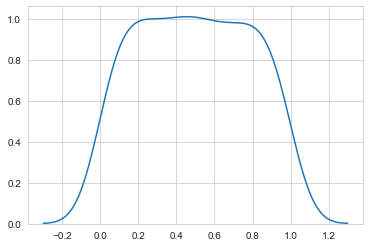

In [21]:
y = np.random.uniform(0,1,10000);
sns.kdeplot(np.array(y), bw=0.1)
#the flat line below should indicate it is an uniform distribution
plt.show()

In [22]:
stats.kstest(y, 'norm')

KstestResult(statistic=0.5000289032239691, pvalue=0.0)

pvalue should be 0, which means y does not follow normal distribution

### End